## Identifying patterns that determine whether a game succeeds or not

This Project is for an online store that sells video games all over the world. They have provided us with a variety of data such as; user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales. Based on the above data we will have to identify patterns that can potentially determine whether a game succeeds or not. It's important to note the dataset contains the abbreviation ESRB, which stands for Entertainment Software Rating Board - evaluates a game's content and assigns an age rating such as Teen or Mature.

## General Information

We start our project by loading the required libraries that we will need to complete future tasks. Additionally, we open our dataset and have a first glance in our data.

In [1]:
import numpy as np
#needed for mathematical operations

import pandas as pd
#needed for dataframe manipulation

import seaborn as sns 
#needed for data visualization

from scipy import stats as st
#needed for statistical analysis

import matplotlib.pyplot as plt
#needed for data visualization

import warnings
warnings.filterwarnings ("ignore")
#needed to ignore future warnings

In [2]:
df = pd.read_csv("/datasets/games.csv")
#loading our dataset

df.shape
#getting the dataset's number of rows and columns 

df.info()
#getting the main info from our dataset

df.head()
#printing the first 5 rows of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Initial Conclusion

We can identify a variety of problems with our current dataset. We will have to do the following:

- Convert the data to the required types. 
- Replace the column names (make them all lowercase)
- Calculate total sales for each game and add these values in a separate column.
- Find a way to efficiently deal with all the missing values after calculating the % for each column's missing values.

## Data Preprocessing

In [3]:
df.columns = df.columns.str.lower()
#converting all columns to lower case letters

(df.isnull().sum()/len(df)).round(4)
#getting the % of missing values for each column

name               0.0001
platform           0.0000
year_of_release    0.0161
genre              0.0001
na_sales           0.0000
eu_sales           0.0000
jp_sales           0.0000
other_sales        0.0000
critic_score       0.5132
user_score         0.4009
rating             0.4048
dtype: float64

### Platform Column

In [4]:
df['platform'] = df['platform'].str.lower()
#making all letters in the column lower case

Column has no missing values. We just converted all letters to lower case to simplify our future tasks.

### Name Column

In [5]:
print(df[df['name'].isnull()] )
#printing the null rows in the column

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      gen           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      gen           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [6]:
df['name'] = df['name'].str.lower()
#making all letters in the column lower case

df['name'].unique()
#getting the unique names

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

Here we notice that mario kart includes the platform name on its name and probably that is not meant to be that way. Just in case we will proceed based on the assumption that this can be seen in a variety of other games too so we will create a function that will take a row as an argument and will be checking if the name includes the platform name as well, in the scenario that it does we will automate the platform name to be removed from the name. We will use the try / except because we have 2 missing values so the function will only operate if and when the value is not na.

In [7]:
def removing_platform_name (row):
    #naming our function'removing_platform_name' and passing row as argument
    
    try:
        name = row['name']
        #storing the row['name'] value into a variable called name
        
        if row['platform'] in row ['name']:
        #if the 'platform name' is seen in the 'name' variable
        
            name = row['name'].strip(row['platform'])
            #then we use the strip() method to remove it from the name
            
            return name 
            #returning new name

        else:
        #if the 'platform name' is not seen in the 'name' variable 
        
            return name 
            #will simply return the current name
        
    except:
        #this applies only when there're missing values
        
        name = row['name']
        #storing the row['name'] value into a variable called name

        return name 
        #will simply return the current name

df['name'] = df.apply(removing_platform_name, axis=1)
#applying the function above to our dataset's column 'name'

df.head()
#printing the first 5 rows of our dataset

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
df['name'] = df['name'].dropna()
#dropping the null rows in the column

Since there's only two missing values in this column we will drop them. It's either values that were never entered or entered incorrectly. We converted all letters to lower case to simplify our future tasks. Other than the comments stated above the column looks good with no additional steps required. 

### Year of Release Column

In [9]:
df['year_of_release'].isnull().sum() 
#printing the number of null rows in the column

269

In [10]:
df['year_of_release'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
16710    False
16711    False
16712    False
16713    False
16714    False
Name: year_of_release, Length: 16715, dtype: bool

In [11]:
grouped_median_year = df.groupby('platform')['year_of_release'].median().to_dict()
# grouping our dataframe by platform to find the median year_of_release per platform
# storing the resulting dataframe into a dictionary named grouped_median_year

def filling_missing_values (row):
    #creating a function called filling_missing_values that takes a variable 'row' as its argument

    if np.isnan(row['year_of_release']):
    #if the value of year_of_release column is missing

        return grouped_median_year.get(row['platform'])
        #returning the median year_of_release value based on the corresponding platform 
    
    else:
    #if the value of year_of_release column is not missing
  
        return row['year_of_release']
        #will return its existing value

df['year_of_release'] = df.apply(filling_missing_values, axis=1)
#applying the filling_missing_values function to the year_of_release column in our dataframe

df.info()
#confirming the above changes 

df['year_of_release'].isnull().sum() 
#printing the number of null rows in the column, now should be 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


0

In the 'year_of_release' column we had 1.61% missing values and decided to replace them with the median. However it wouldn't be accurate to replace them by the total median and thus we decided to first create a dictionary with the median per platform and then replace missing values according their platform, that way would be more accurate.

### Genre Column

In [12]:
df['genre'] = df['genre'].str.lower()
#making all letters in the column lower case

df['genre'].unique()
#getting the unique names

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

In [13]:
df['genre'].isnull().sum() 
#printing the number of null rows in the column

df['genre'] = df['genre'].dropna()
#dropping the null rows in the column

Column has only 2 missing values and thus we will leave it as it is. We just converted all letters to lower case to simplify our future tasks.

### Critic Score Column

In [14]:
df['critic_score'].isnull().sum() 
#printing the number of null rows in the column

8578

In [15]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Here we have 51% of our data being missing values. We can't replace them by the median/mean since is very individual as every critic has own oppinion on the game. If we just NaNs with some mean (even based on other column) it can spoil our final result as critic score will not be representative anymore. We will replace with a dummy value that is not pragmatice such as -1.

In [16]:
df['critic_score'] = df['critic_score'].fillna(value=-1)
#filling all missing values with -1 since is not a pragmatic value

df['critic_score'].isnull().sum() 
#printing the number of null rows in the column, now should be 0

0

In the 'critic_score' column we had 51% missing values which we replaced by a dummy value that is not pragmatice such as -1. We couldn't replace them by the median/mean since is very individual as every critic has own oppinion on the game. Now our column is good for analysis.

Lastly, we can conclude that the missing values are probably due to the fact that not all critics submit a review for each game. 

### User Score Column

In [17]:
df['user_score'].unique()
#printing all the unique values

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Here we noticed that the column is an object type column even though it should have been float64. So we decided to take a closer look at the unique values to determine what make this column an object type column. We see that there's a value 'tbd' (to be determined) this refers to data that we are expecting to have but haven't gotten yet thus we will need to replace with na and convert column to float. Later, we will need to follow the same strategy as above to replace column's missing values by taking the median user_score per genre.

In [18]:
df['user_score'] = df['user_score'].fillna(value=-1)
#filling all missing values with -1 since is not a pragmatic value

df['user_score'] = df['user_score'].replace("tbd", "-1")
#replacing all "tbd" values with -1 since is not a pragmatic value

df['user_score'] = pd.to_numeric(df['user_score'])
#convertingd column's data type from string to numeric

df['user_score'].isnull().sum() 
#printing the number of null rows in the column, now should be 2

0

In [19]:
df['user_score'].unique()
#printing all the unique values

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

Now our column is "clean" and ready for analysis!

Lastly, we can conclude that the missing values are probably due to the fact that not all users submit a review. We can think all the times when we were personally asked to write a review for a product and instead we politely declined. 

### Rating Column

Approximately 40% of the values in this column are missing values and we have to take care of them but first let's take a closer look at the unique values to understand what they stand for. 

In [20]:
df['rating'].unique()
#printing all the unique values

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [21]:
df['rating'] = df['rating'].fillna(value="no info")
#filling all missing values with -1 since is not a pragmatic value

In [22]:
df['rating'].unique()
#confirming all changes have been made

array(['E', 'no info', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

These ESRB ratings (Enetrtainment Software Rating Board) are the signs that we see on the game's packaging, for example 'E' stands for Everyone, 'E10+' stands for everyone 10+ etc. We will leave the missing values as they are.  Since that was the last column we needed to "correct" now our dataset looks ready for analysis. 

### Adding Total Sales Column

In [23]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
#adding the new column of total sales by summing the sales of all regions 

df.info()
#new dataset's information

df.head()
#confirming the above changes  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no info,40.24
2,mario kart,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no info,31.38


### Data Preprocessing Conclusion

We have now cleaned our data and we are ready to start our data analysis based on reliable data that we can count on. Before moving forward let's quickly summarize all the steps we have taken thus far:

- We edited the names for each game so that it wouldn't include the platform name as well
- We have updated all columns to their correct data type (such as column: user_score to float)
- We have replaced all missing values with the corresponding median or moder (after first grouping the data according to the each column's conidtion)
- Lastly, we added additional column to our dataset such as the total_sales by summing all sales of all regions. So now we can easily the total sales per game

## Analysis

### Games Released per Year

In [24]:
year_count = df.groupby('year_of_release')['name'].count()
# grouping our dataframe by year_of_release to find the amount of games released that year

year_count

year_of_release
1980.0       9
1981.0      46
1982.0      53
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     290
1998.0     386
1999.0     341
2000.0     350
2001.0     482
2002.0     829
2003.0     800
2004.0     783
2005.0     973
2006.0    1006
2007.0    1197
2008.0    1457
2009.0    1476
2010.0    1302
2011.0    1161
2012.0     653
2013.0     552
2014.0     582
2015.0     606
2016.0     502
Name: name, dtype: int64

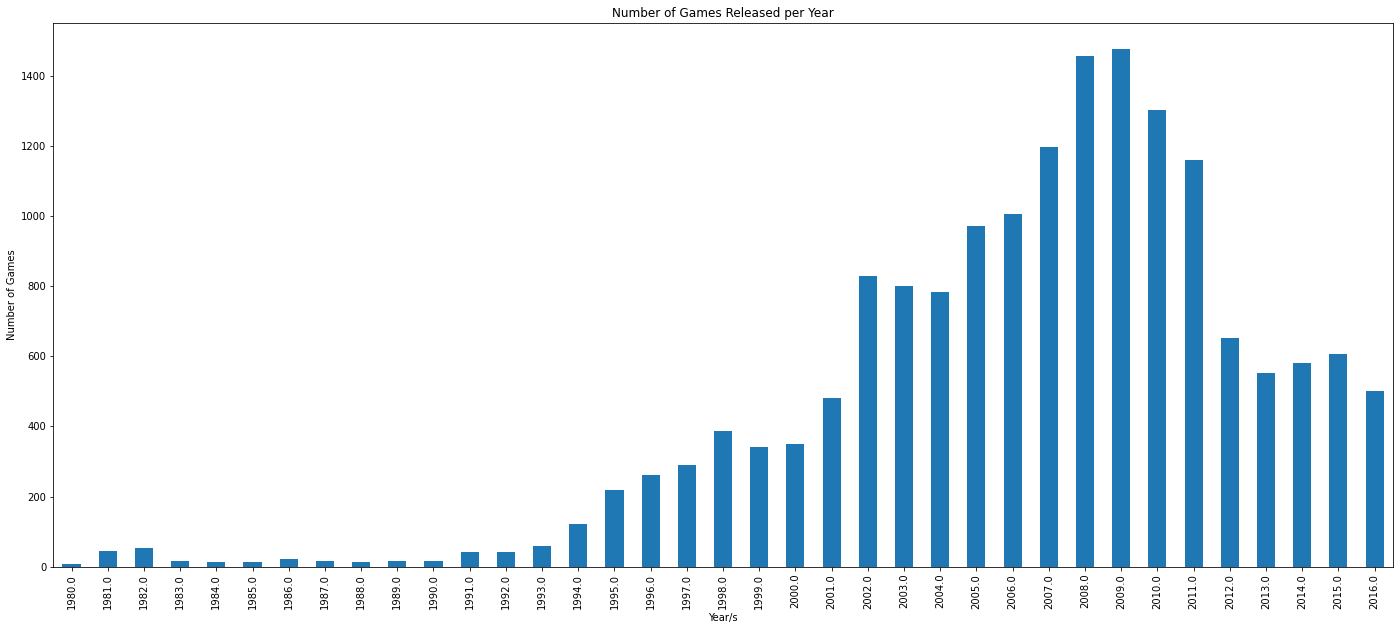

In [25]:
year_count.plot(kind='bar', figsize=(24, 10))
#creating a bar chart

plt.title("Number of Games Released per Year")
#having a title to the chart

plt.xlabel("Year/s")
#naming x axis

plt.ylabel("Number of Games")
#naming y axis

plt.show()

Based on the above graph we can clearly identify an exponential growth of game releases between the years of 2007 and 2011, with the pick being in 2009 with approximately 1500 games release. Thus not all periods are significant.

### Platform Performance

In [26]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
#grouping our dataframe by platform to find its total amount of sales

top_platforms = platform_sales.head()
#top 5 platforms

top_platforms

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
Name: total_sales, dtype: float64

Here we can identiffy a clear winner, which is ps2 with more than 1.2B, followed by x360, ps3, wii and ds.

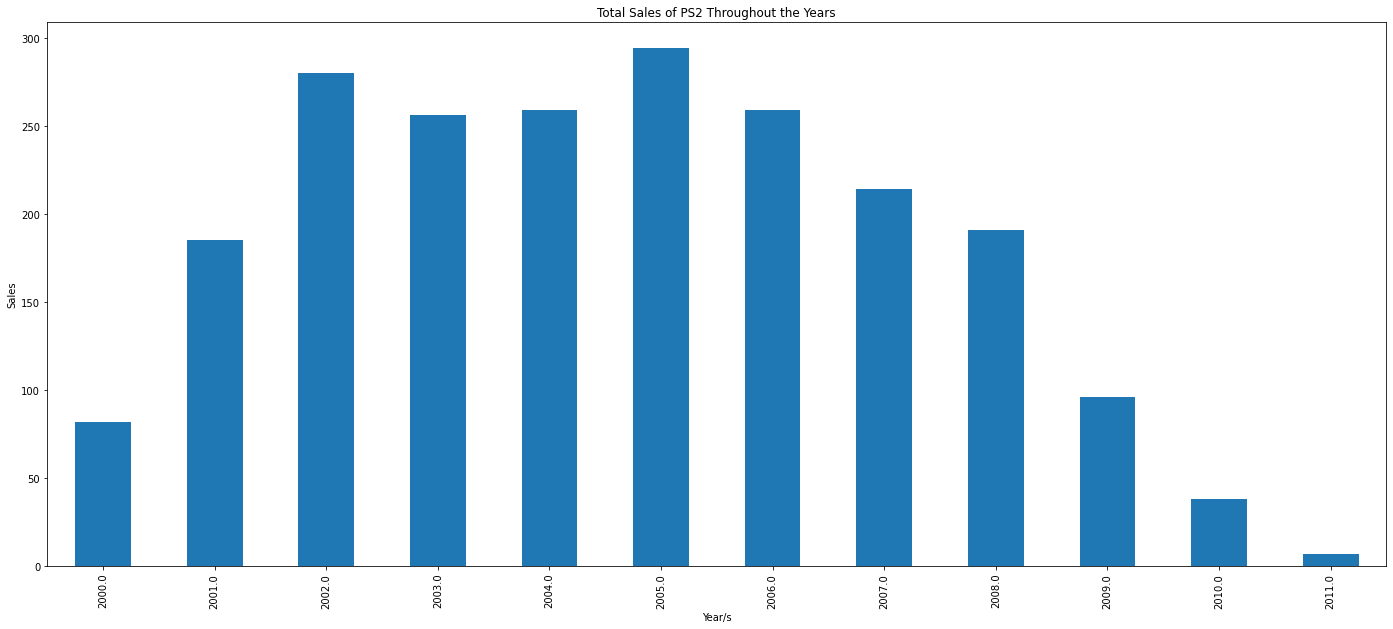

In [27]:
ps2_data = df[df['platform'] == 'ps2']
#storing all ps2 data to a new variable

ps2_sales = ps2_data.groupby('year_of_release')['total_sales'].count()
#grouping our new dataframe by year/s to find its total amount of sales

ps2_sales.plot(kind='bar', figsize=(24, 10))
#creating a bar chart

plt.title("Total Sales of PS2 Throughout the Years")
#having a title to the chart

plt.xlabel("Year/s")
#naming x axis

plt.ylabel("Sales")
#naming y axis

plt.show()

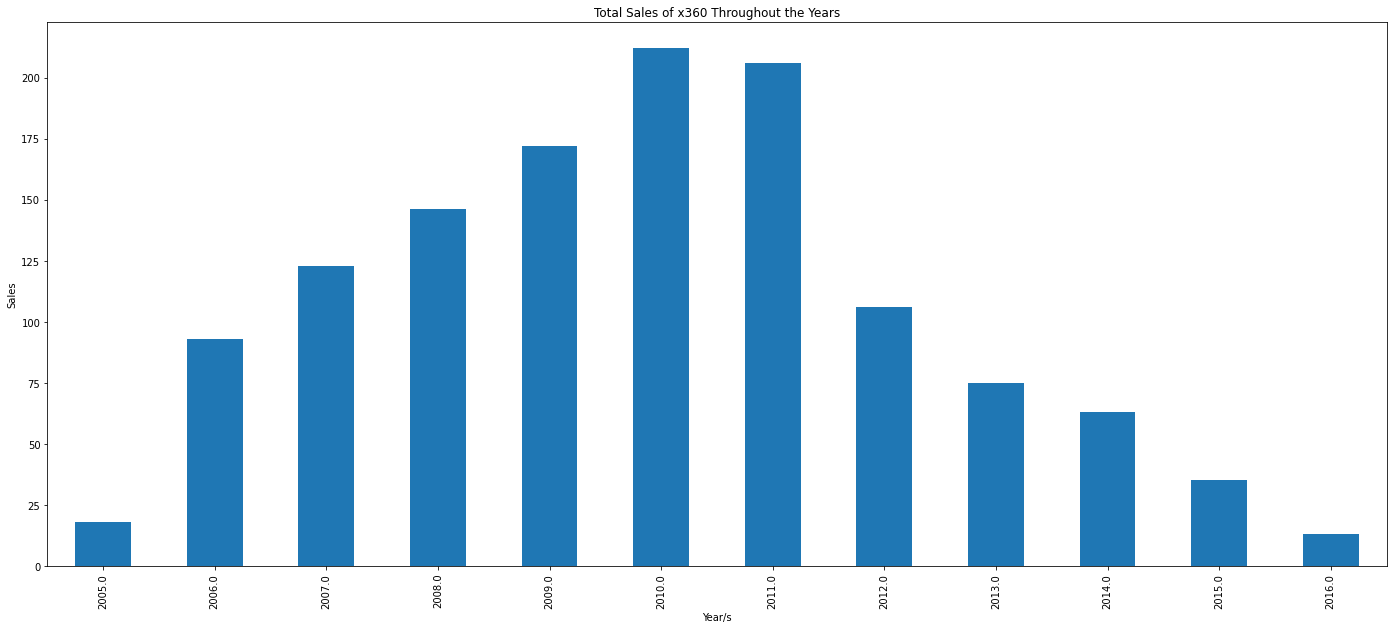

In [28]:
x360_data = df[df['platform'] == 'x360']
#storing all x360 data to a new variable

x360_sales = x360_data.groupby('year_of_release')['total_sales'].count()
#grouping our new dataframe by year/s to find its total amount of sales

x360_sales.plot(kind='bar', figsize=(24, 10))
#creating a bar chart

plt.title("Total Sales of x360 Throughout the Years")
#having a title to the chart

plt.xlabel("Year/s")
#naming x axis

plt.ylabel("Sales")
#naming y axis

plt.show()

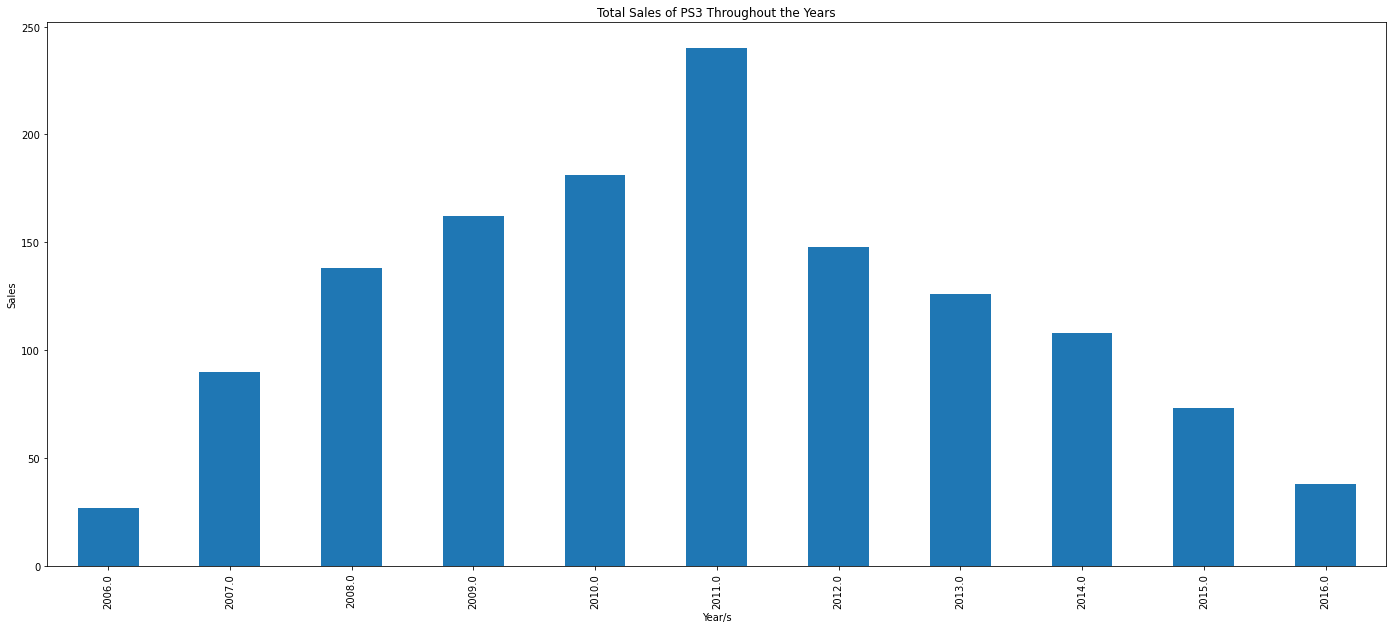

In [29]:
ps3_data = df[df['platform'] == 'ps3']
#storing all ps3 data to a new variable

ps3_sales = ps3_data.groupby('year_of_release')['total_sales'].count()
#grouping our new dataframe by year/s to find its total amount of sales

ps3_sales.plot(kind='bar', figsize=(24, 10))
#creating a bar chart

plt.title("Total Sales of PS3 Throughout the Years")
#having a title to the chart

plt.xlabel("Year/s")
#naming x axis

plt.ylabel("Sales")
#naming y axis

plt.show()

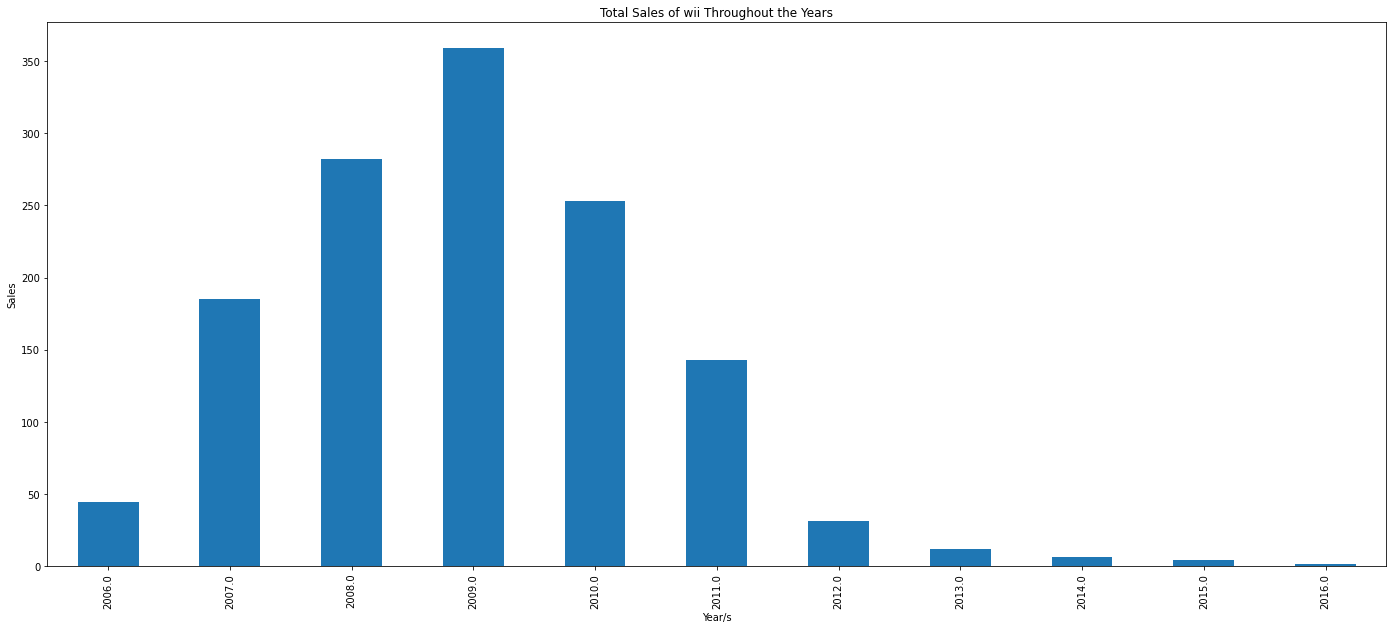

In [30]:
wii_data = df[df['platform'] == 'wii']
#storing all wii data to a new variable

wii_sales = wii_data.groupby('year_of_release')['total_sales'].count()
#grouping our new dataframe by year/s to find its total amount of sales

wii_sales.plot(kind='bar', figsize=(24, 10))
#creating a bar chart

plt.title("Total Sales of wii Throughout the Years")
#having a title to the chart

plt.xlabel("Year/s")
#naming x axis

plt.ylabel("Sales")
#naming y axis

plt.show()

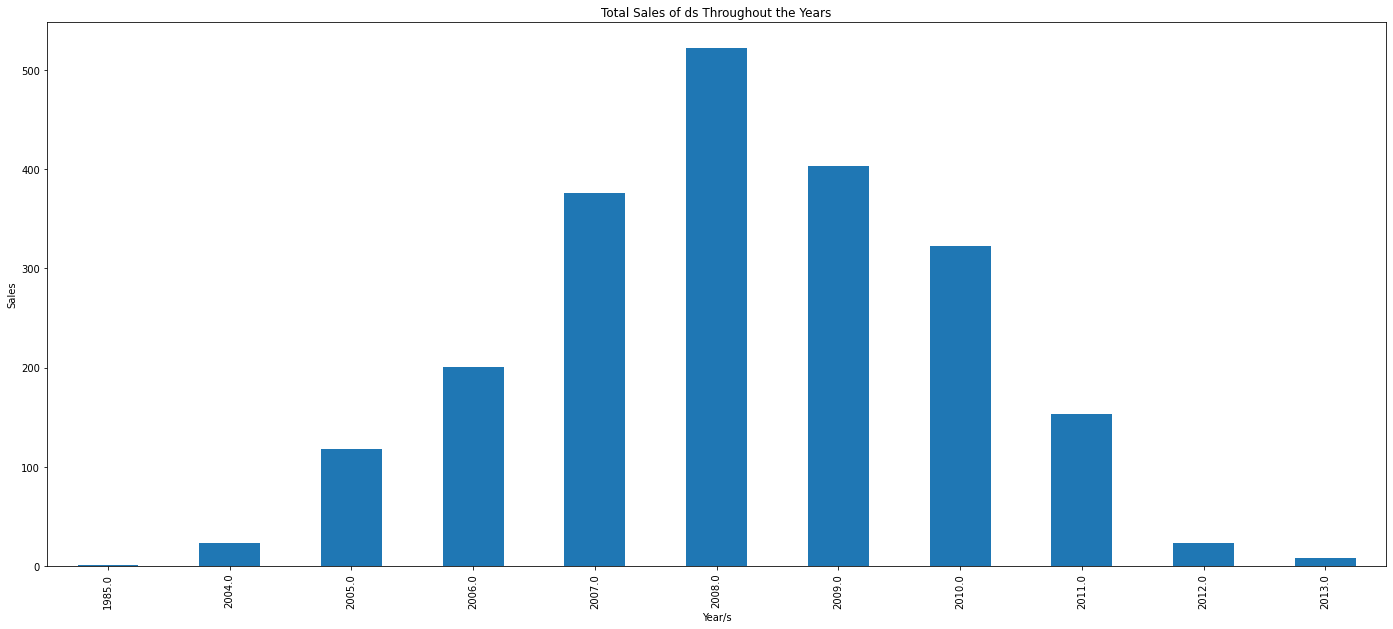

In [31]:
ds_data = df[df['platform'] == 'ds']
#storing all ds data to a new variable

ds_sales = ds_data.groupby('year_of_release')['total_sales'].count()
#grouping our new dataframe by year/s to find its total amount of sales

ds_sales.plot(kind='bar', figsize=(24, 10))
#creating a bar chart

plt.title("Total Sales of ds Throughout the Years")
#having a title to the chart

plt.xlabel("Year/s")
#naming x axis

plt.ylabel("Sales")
#naming y axis

plt.show()

We were able to create graph charts for each of the 5 most common platforms, ps2, x360, ps3, wii and ds. All the graphs above show the ditribution of sales throughout the year per platform. After taking a closer look we can identify:

ps2: 10 years of sales period from 2000 to 2011 (approximately 5 years dominated the market from 2002 to 2006)

x360: 12 years of sales period from 2005 to 2016 (approximately 2 years dominated the market from 2010 to 2011)

ps3: 11 years of sales period from 2006 to 2016 (approximately 1 year dominated the market in 2011)

wii: 11 years of sales period from 2006 to 2016 (approximately 3 years dominated the market from 2008 to 2010)

ds: 11 years of sales period from 2004 to 2013 (approximately 1 year dominated the market from 2007 to 2011)

We can identify that most game platforms last around 11 years. Additionally, they are being popular (dominating the market) for approximately 4/5 years before they start fading out. After taking a closer look at the graphs above we determine to keep data for the last 4 years to efficiently build a prognosis for the year of 2017. We choose 4 years because game market is very dynamic.

### Platform Performance after 2012

In [32]:
new_df = df[df['year_of_release'] >= 2013.0]
#storing data from and after the year of 2007 to a new variable called 'new_df'

platform_sales2 = new_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
#grouping our dataframe by platform to find its total amount of sales

top_platforms2 = platform_sales2.head(10)
#top 10 platforms

top_platforms2

platform
ps4     314.14
ps3     181.43
xone    159.32
3ds     144.44
x360    136.80
wiiu     64.63
pc       39.43
psv      33.25
wii      13.66
psp       3.50
Name: total_sales, dtype: float64

Since 2013 ps3 is the platform with the most sales, specifically 918M and x360 comes second with 911M and third we have wii with 770M. We can see that choosing the more recent yet relevant data changes our top platforms. We previously had ps2 in number 1 and now ps2 is number 9, clearly ps2 sales are shrinking potentially because the new versions have entered the market such as ps3 and ps4. Moving forward we are going to keep the top 5 in the above list, ps3, x360, wii, ds and ps4. 

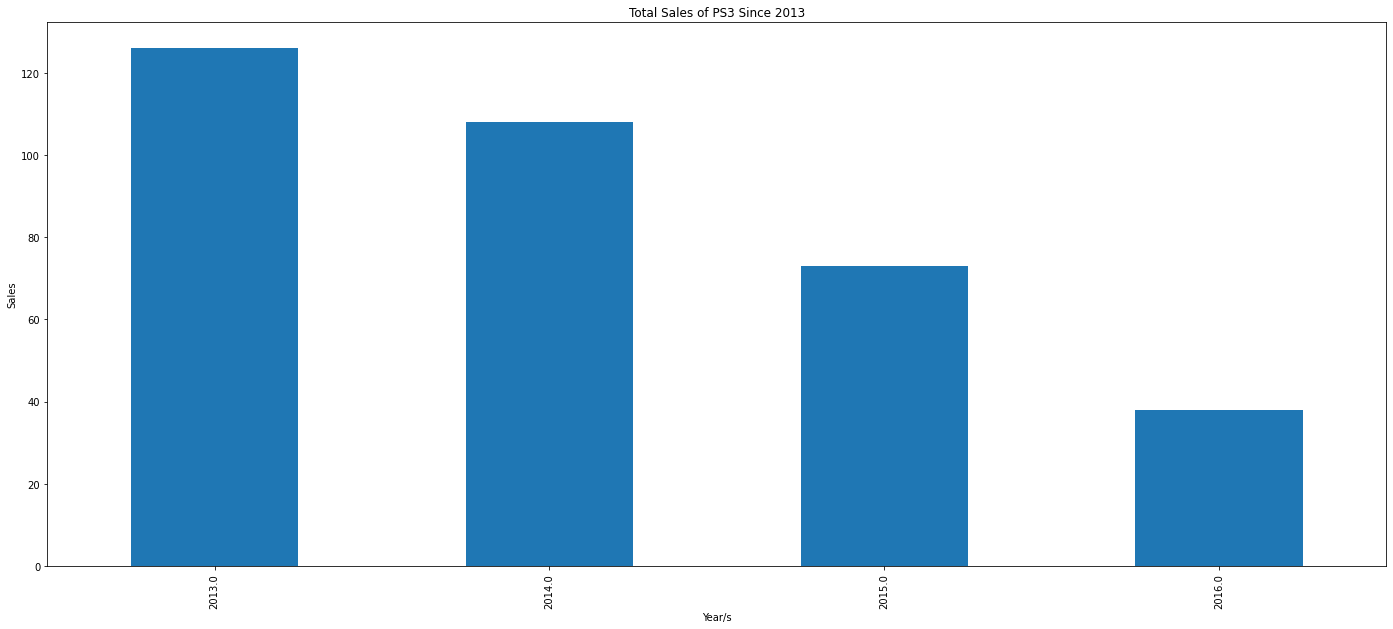

In [33]:
new_ps3_data = new_df[new_df['platform'] == 'ps3']
#storing all ps3 data to a new variable

new_ps3_sales = new_ps3_data.groupby('year_of_release')['total_sales'].count()
#grouping our new dataframe by year/s to find its total amount of sales

new_ps3_sales.plot(kind='bar', figsize=(24, 10))
#creating a bar chart

plt.title("Total Sales of PS3 Since 2013")
#having a title to the chart

plt.xlabel("Year/s")
#naming x axis

plt.ylabel("Sales")
#naming y axis

plt.show()

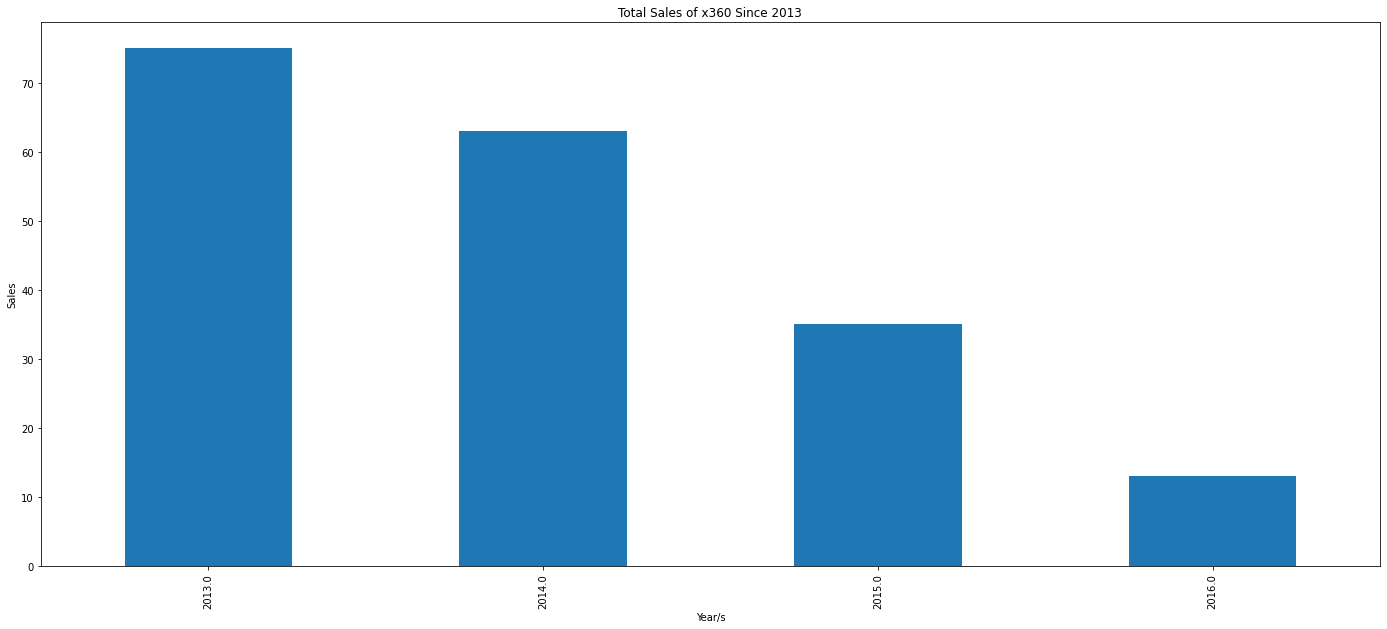

In [34]:
new_x360_data = new_df[new_df['platform'] == 'x360']
#storing all x360 data to a new variable

new_x360_sales = new_x360_data.groupby('year_of_release')['total_sales'].count()
#grouping our new dataframe by year/s to find its total amount of sales

new_x360_sales.plot(kind='bar', figsize=(24, 10))
#creating a bar chart

plt.title("Total Sales of x360 Since 2013")
#having a title to the chart

plt.xlabel("Year/s")
#naming x axis

plt.ylabel("Sales")
#naming y axis

plt.show()

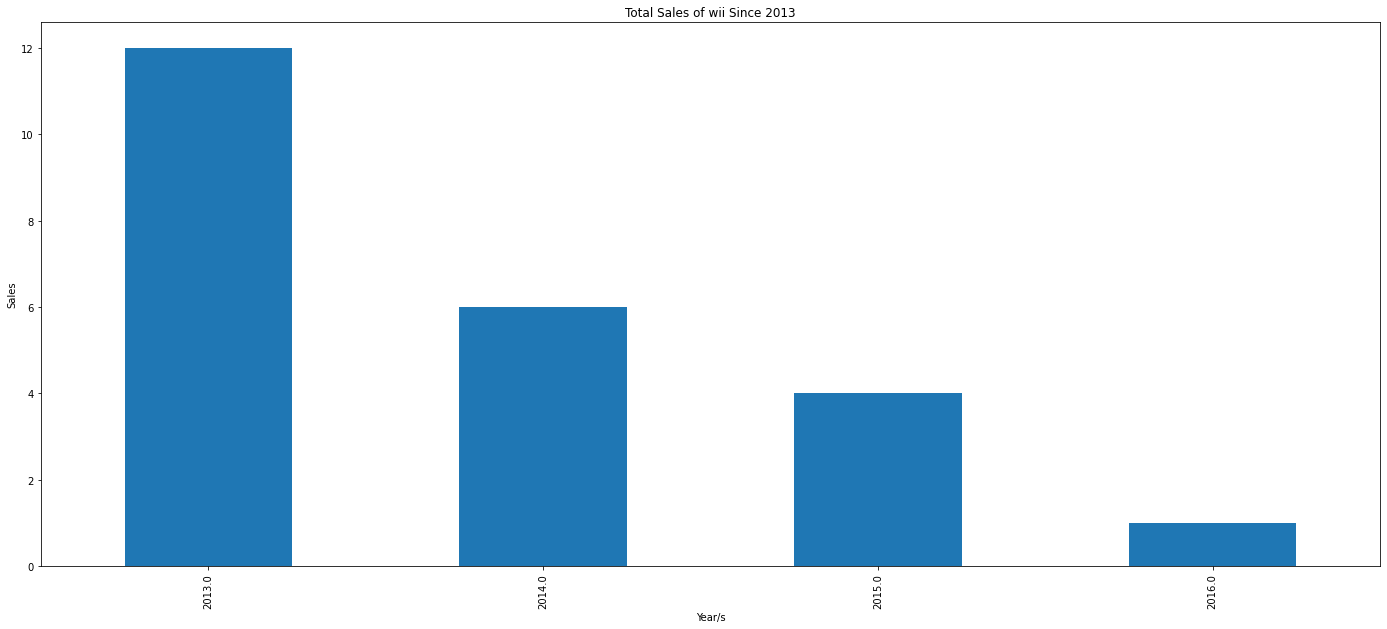

In [35]:
new_wii_data = new_df[new_df['platform'] == 'wii']
#storing all wii data to a new variable

new_wii_sales = new_wii_data.groupby('year_of_release')['total_sales'].count()
#grouping our new dataframe by year/s to find its total amount of sales

new_wii_sales.plot(kind='bar', figsize=(24, 10))
#creating a bar chart

plt.title("Total Sales of wii Since 2013")
#having a title to the chart

plt.xlabel("Year/s")
#naming x axis

plt.ylabel("Sales")
#naming y axis

plt.show()

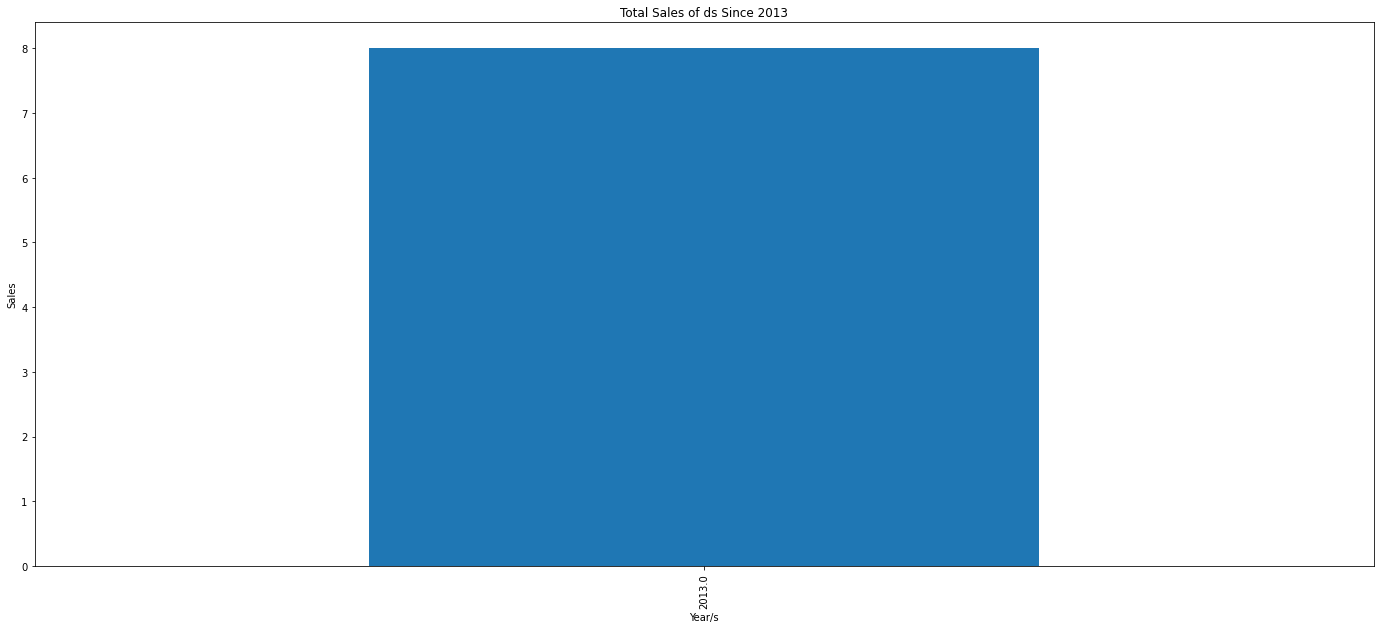

In [36]:
new_ds_data = new_df[new_df['platform'] == 'ds']
#storing all ds data to a new variable

new_ds_sales = new_ds_data.groupby('year_of_release')['total_sales'].count()
#grouping our new dataframe by year/s to find its total amount of sales

new_ds_sales.plot(kind='bar', figsize=(24, 10))
#creating a bar chart

plt.title("Total Sales of ds Since 2013")
#having a title to the chart

plt.xlabel("Year/s")
#naming x axis

plt.ylabel("Sales")
#naming y axis

plt.show()

Here for ds we don't have any year other than 2013 since we kept data from 2013 and onwards and 2013 was was the last year of sales for the platform.

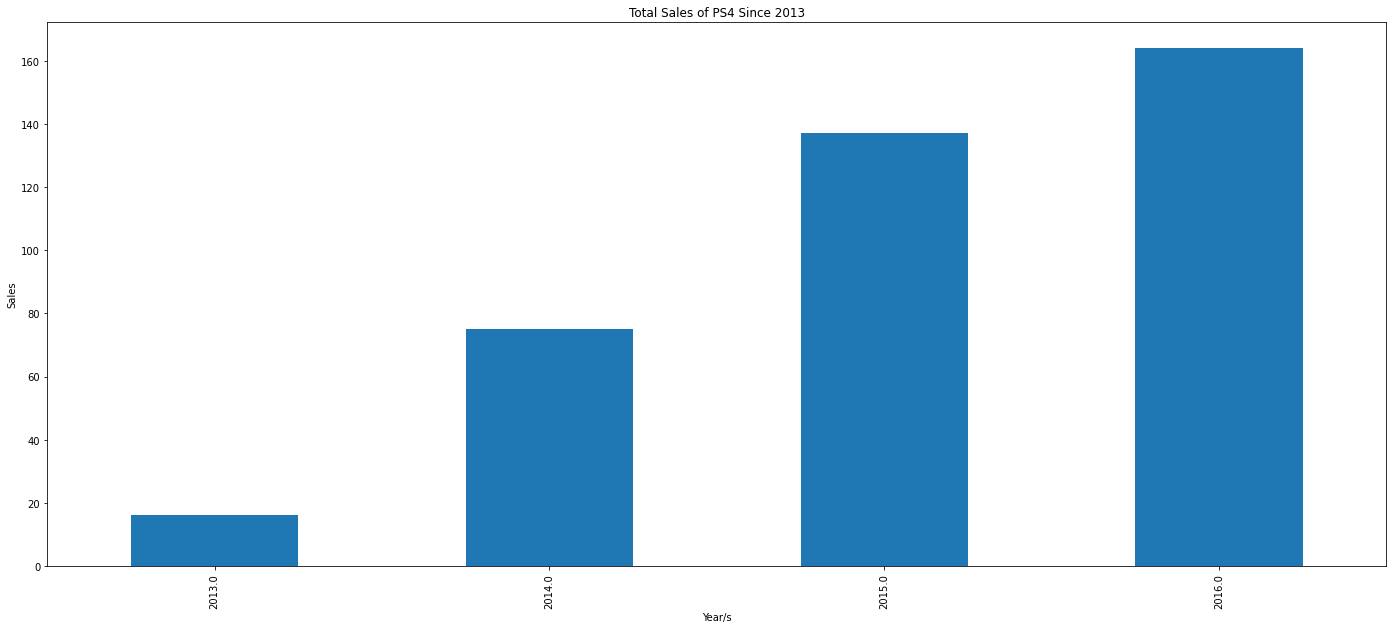

In [37]:
new_ps4_data = new_df[new_df['platform'] == 'ps4']
#storing all ps4 data to a new variable

new_ps4_sales = new_ps4_data.groupby('year_of_release')['total_sales'].count()
#grouping our new dataframe by year/s to find its total amount of sales

new_ps4_sales.plot(kind='bar', figsize=(24, 10))
#creating a bar chart

plt.title("Total Sales of PS4 Since 2013")
#having a title to the chart

plt.xlabel("Year/s")
#naming x axis

plt.ylabel("Sales")
#naming y axis

plt.show()

After visualizing the sales of the top 5 platforms since 2013 we can identify that wii sales start shrinking after 2013. Ds stops having any sales after the year 2013. x360 sales start shrinking after 2013 and ps3 sales start slowing down after 2015. Lastly ps4 seems to be the most promising due to the fact that is also the newest platform so we can see that it entered the market in 2013 and from our previous analysis we predict that will stay popular for approximately 10/11 years in total so for about the next 6/7 years. 

### Box Plot for the Total Sales of all Games for the top 5 platforms

Let's start by plotting all the total sales per platform from our new_df variable, the data which we conclude that is the most relevant data. After getting a first glance at it then we will specifically analyze each single platform of our top 5 so, ps3, x360, wii, ds and ps4.

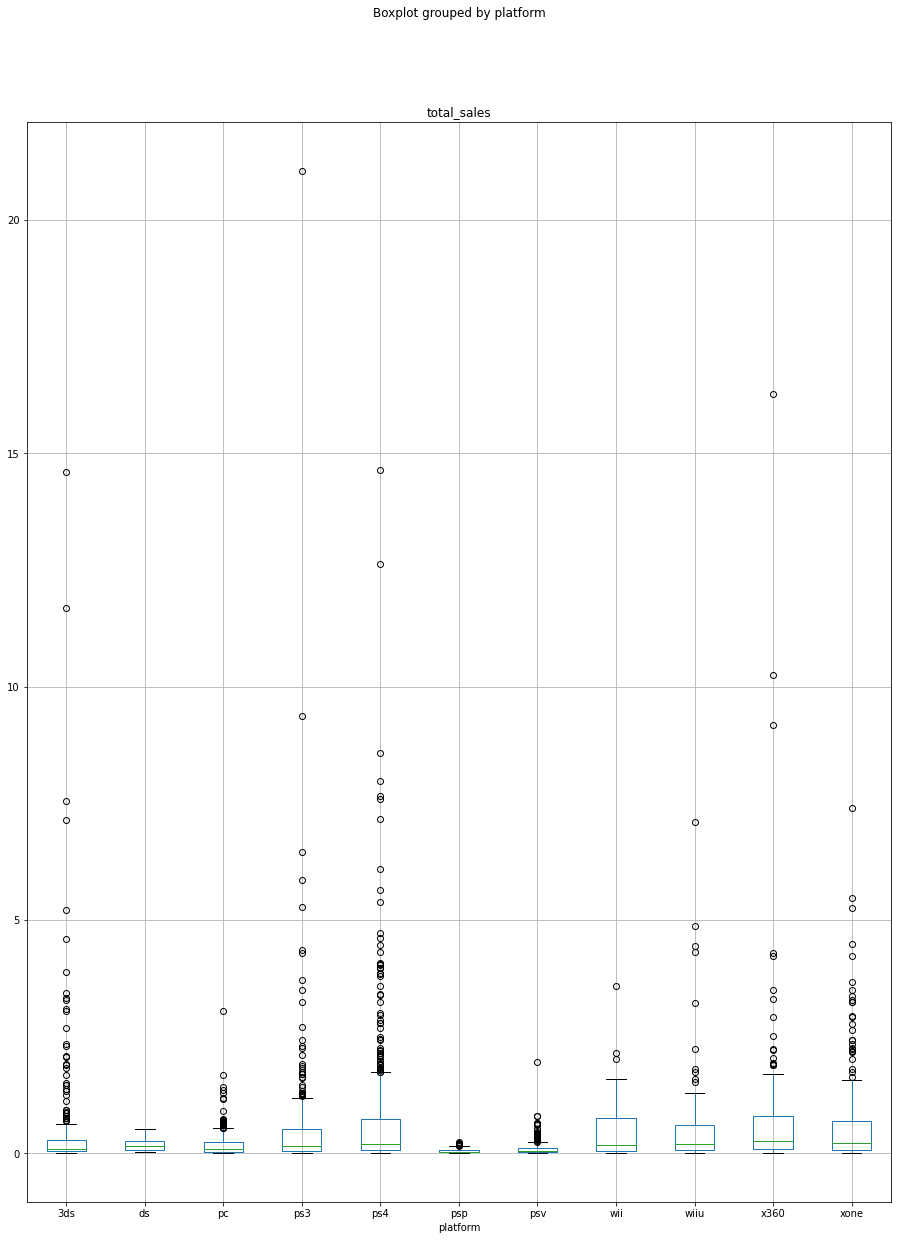

In [38]:
new_df.boxplot(column='total_sales', by='platform', figsize=(15,20))
#plotting a boxplot for the total_sales column that has size 15 x 10 inches

plt.show()
#showing the boxplot

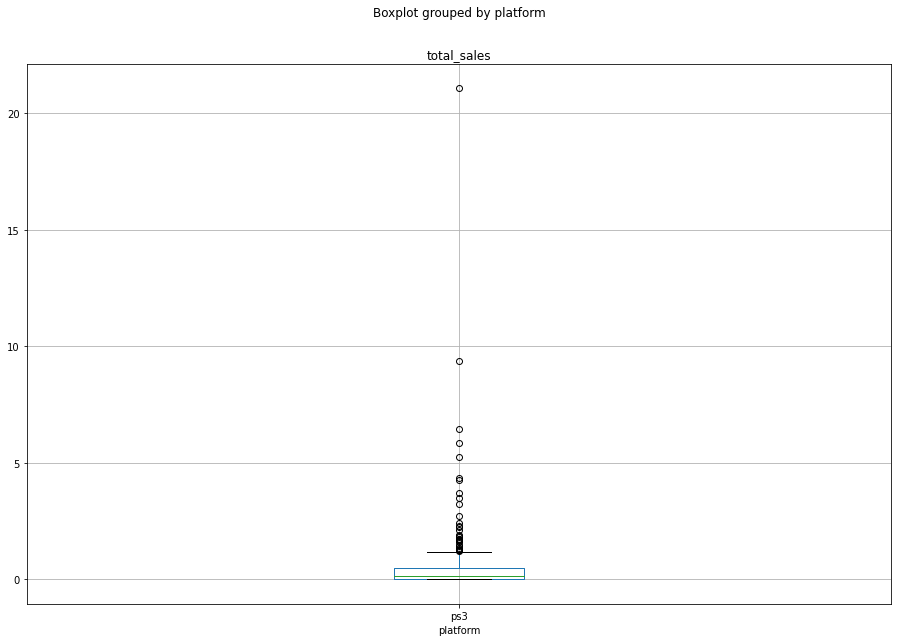

In [39]:
new_ps3_data.boxplot(column='total_sales', by='platform', figsize=(15,10))
#plotting a boxplot for the total_sales column of ps3 that has size 15 x 10 inches

plt.show()
#showing the boxplot

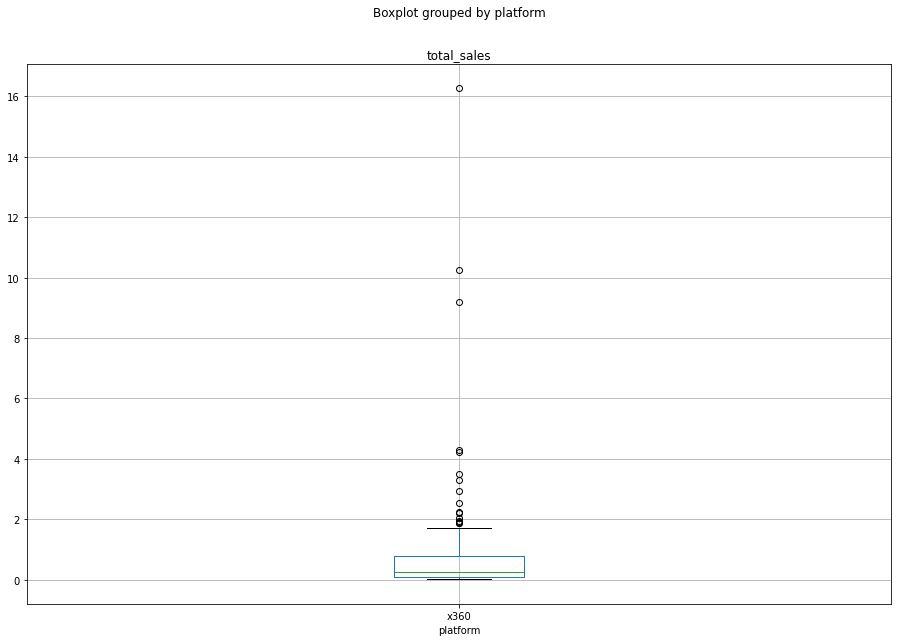

In [40]:
new_x360_data.boxplot(column='total_sales', by='platform', figsize=(15,10))
#plotting a boxplot for the total_sales column of x360 that has size 15 x 10 inches

plt.show()
#showing the boxplot

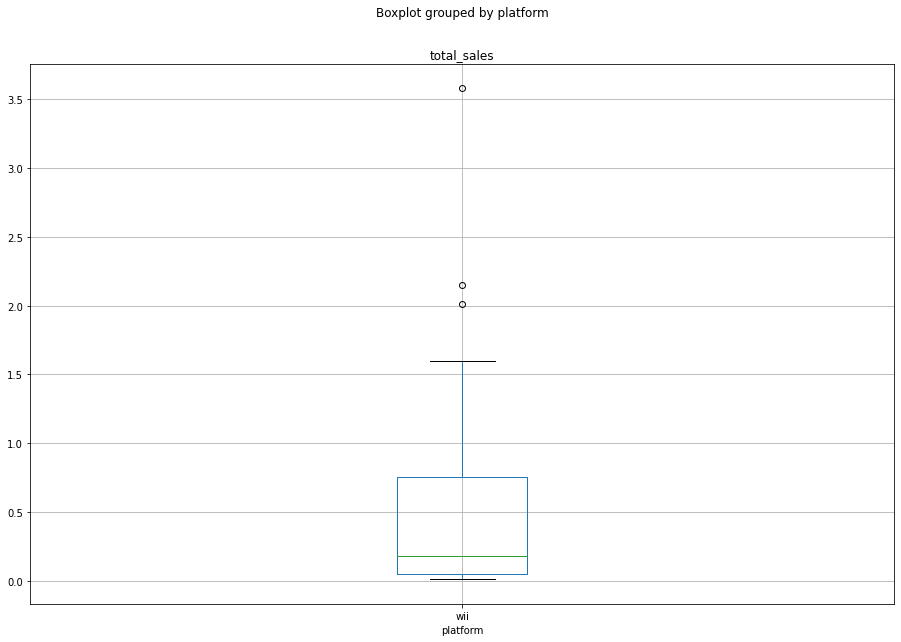

In [41]:
new_wii_data.boxplot(column='total_sales', by='platform', figsize=(15,10))
#plotting a boxplot for the total_sales column of wii that has size 15 x 10 inches

plt.show()
#showing the boxplot

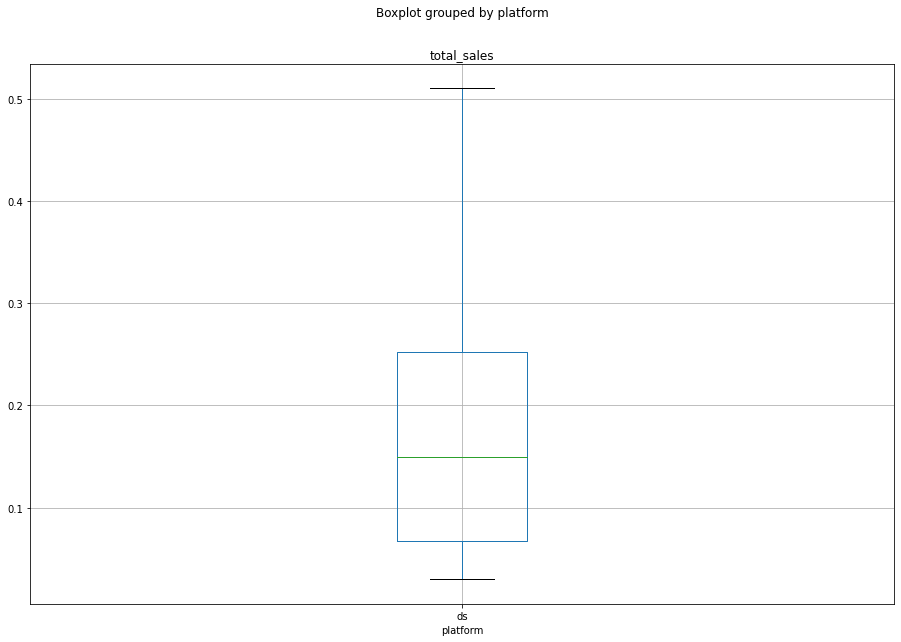

In [42]:
new_ds_data.boxplot(column='total_sales', by='platform', figsize=(15,10))
#plotting a boxplot for the total_sales column of ds that has size 15 x 10 inches

plt.show()
#showing the boxplot

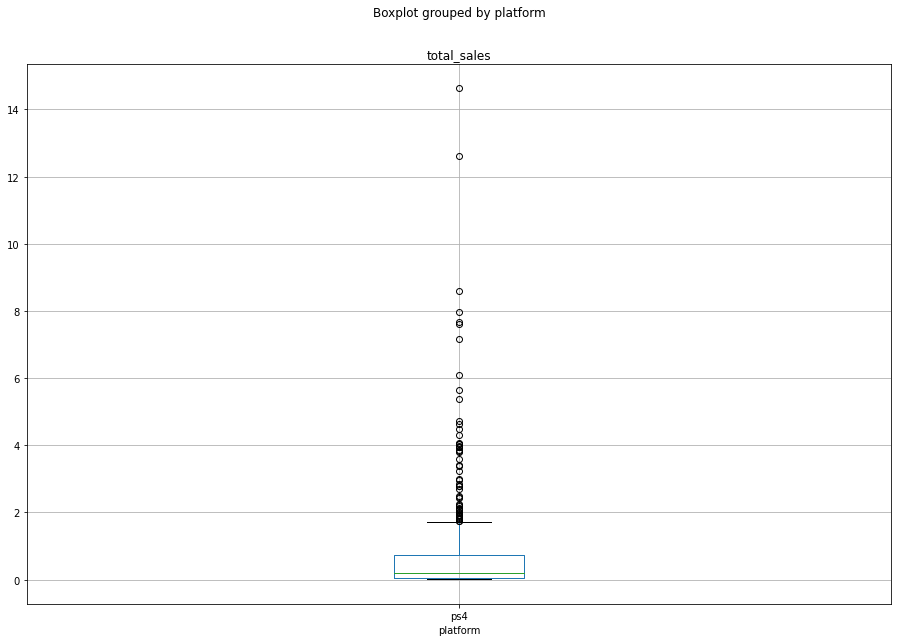

In [43]:
new_ps4_data.boxplot(column='total_sales', by='platform', figsize=(15,10))
#plotting a boxplot for the total_sales column of ps4 that has size 15 x 10 inches

plt.show()
#showing the boxplot

We can identify no major difference between the boxplots. All medians are close to 0 however we notice extreme outliers for every platform which represent the games that were extremelly successful. 

PS3 & x360 platforms:
More specifically, for ps3 and x360 (have very similar data) we notice that all 4 quartiles are approximately 2 which means that all of the games made a total profit of around 2M, however there's a lot of outliers, which means that there's been a variety of games that had sales well above the max, lots of ourliers ate between 5-10M and there's even some as high as 22M.

wii platform:
Wii data differs from the one analyzed above in the sense that we have all 4 quartiles to be around 0.5M however, there're many extreme outliers. For example we have outliers as high as 35M! 

ds platform & ps4 platforms:
For ds and ps4 platforms (have very similar data), we see a similar pattern; lots of outliers and a median close to 0.

### User & Critic Reviews vs Sales for Nintendo DS Platform

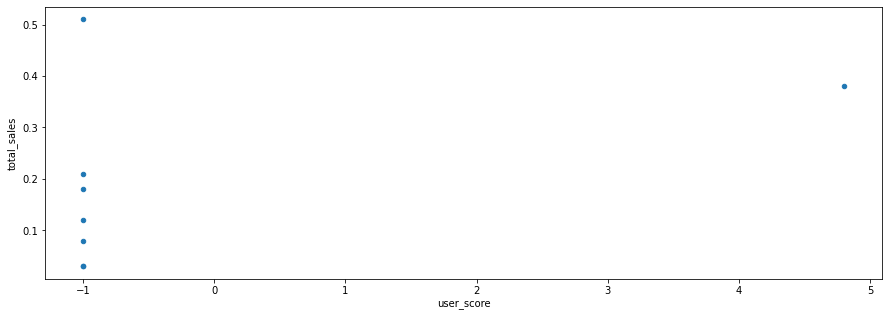

In [44]:
new_ds_data.plot(x='user_score', y='total_sales', kind='scatter', figsize=(15,5))
#plotting a scatter for the new_ds_data with x column user_score and y column the total_sales, size 15 x 5 inches

plt.show()
#showing the scatter plot

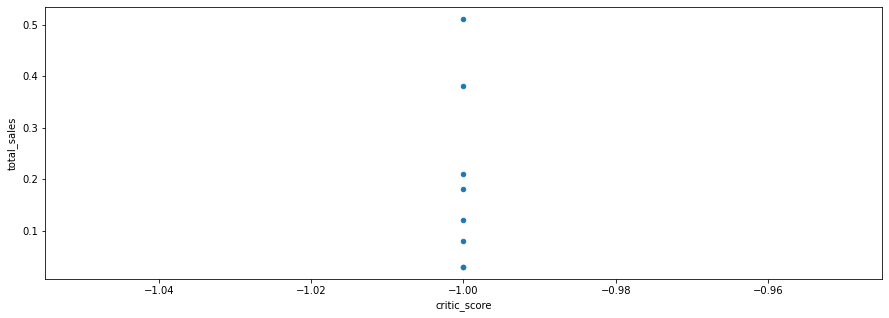

In [45]:
new_ds_data.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,5))
#plotting a scatter for the new_ds_data with x column critic_score and y column the total_sales, size 15 x 5 inches

plt.show()
#showing the scatter plot

We decided to choose the Nintendo Developer's System platform (ds) to analyze further the potential correlation between the user_score / critic_score and the total_sales. Overall we do see visually that the higher the rate of either score the higher the sales will be. More specififcally, we identify visually the user_score to have lots of sales when the score is > 7 and for the critic_score to have lots of success when the score is above > 65. Let's dig deeper by actually performing the correlation coefficient method and see if what we identify visually can be justified.

In [46]:
print (new_ds_data['user_score'].corr(new_ds_data['total_sales']))
#finding the correlation coefficient between user_score and total_sales for ds

print (new_ds_data['critic_score'].corr(new_ds_data['total_sales']))
#finding the correlation coefficient between critic_score and total_sales for ds

0.4404075714674946
nan


After running the correlation method for both the user_score and the critic_score we can identify NO correlation between either score and total_sales. Now let's compare the same game sales to other platforms and see if any of the correlation changes.

In [47]:
print (new_ps3_data['user_score'].corr(new_ps3_data['total_sales']))
#finding the correlation coefficient between user_score and total_sales for ps3

print (new_ps3_data['critic_score'].corr(new_ps3_data['total_sales']))
#finding the correlation coefficient between critic_score and total_sales for ps3

0.20585876865450525
0.2784621201968551


In [48]:
print (new_x360_data['user_score'].corr(new_x360_data['total_sales']))
#finding the correlation coefficient between user_score and total_sales for x360

print (new_x360_data['critic_score'].corr(new_x360_data['total_sales']))
#finding the correlation coefficient between critic_score and total_sales for x360

0.07186362137293789
0.24563559661086223


In [49]:
print (new_wii_data['user_score'].corr(new_wii_data['total_sales']))
#finding the correlation coefficient between user_score and total_sales for x360

print (new_wii_data['critic_score'].corr(new_wii_data['total_sales']))
#finding the correlation coefficient between critic_score and total_sales for x360

0.7879687823512271
nan


In [50]:
print (new_ps4_data['user_score'].corr(new_ps4_data['total_sales']))
#finding the correlation coefficient between user_score and total_sales for ps4

print (new_ps4_data['critic_score'].corr(new_ps4_data['total_sales']))
#finding the correlation coefficient between critic_score and total_sales for ps4

0.1159614931286009
0.22652606614612347


Overall we don't really see any strong correlation coefficient in any platform. However, we can identify a moderate correlation coefficient between the critic_score and total_sales for the platforms of ps4, x360 and ps3. 

In [51]:
new_df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no info,14.63
33,pokemon x/pokemon y,3ds,2013.0,role-playing,5.28,4.19,4.35,0.78,-1.0,-1.0,no info,14.60
42,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014.0,role-playing,4.35,3.49,3.10,0.74,-1.0,-1.0,no info,11.68
60,call of duty: ghosts,x360,2013.0,shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,call of duty: ghosts,ps3,2013.0,shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,minecraft,x360,2013.0,misc,5.70,2.65,0.02,0.81,-1.0,-1.0,no info,9.18
77,fifa 16,ps4,2015.0,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


### Identifying the Most Profitable Genres

We will first identify the amount of games distribution per genre and later we will identify the genres with high and low sales by using the groupby. 

In [52]:
genre_count = new_df.groupby('genre')['total_sales'].count().sort_values(ascending=False)
#collecting all genres and their distribution

genre_count
#printing genres_count

genre
action          767
role-playing    294
adventure       246
sports          215
shooter         188
misc            155
racing           86
fighting         80
platform         74
simulation       64
strategy         56
puzzle           17
Name: total_sales, dtype: int64

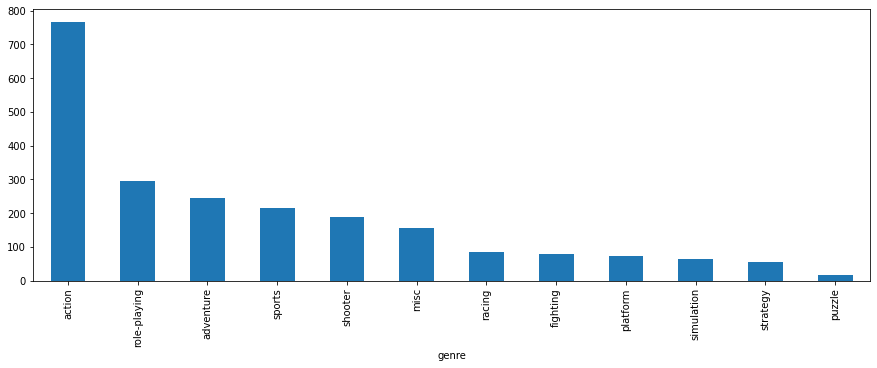

In [53]:
genre_count.plot(kind='bar', figsize=(15,5))
#plotting a bar plot for the genres distribution with size 15 x 5 inches

plt.show()
#showing the bar plot

Here we can see that most of the games that have been distributed in our data belong to the action genre. At second place we have misc (a game developer that aims at developing unique games for various niche markets) and third we have sports. Later, we will analyze the total sales per genre and it will be interesting to see how the total sales per genre compare to the total distribution per genre.

In [54]:
genre_sales = new_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
#collecting all genre_sales in descending order

genre_sales
#printing genre_count

genre
action          322.27
shooter         233.05
sports          150.67
role-playing    146.18
misc             62.82
platform         42.63
racing           39.98
fighting         35.31
adventure        23.73
simulation       22.25
strategy         10.08
puzzle            3.17
Name: total_sales, dtype: float64

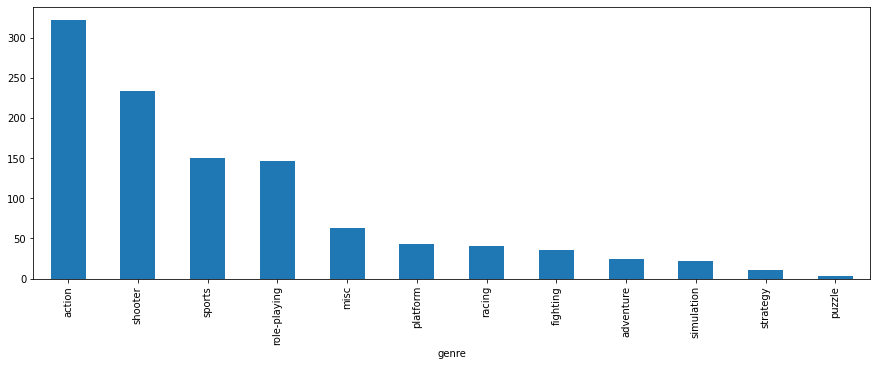

In [55]:
genre_sales.plot(kind='bar', figsize=(15,5))
#plotting a bar plot for the genre sales with size 15 x 5 inches

plt.show()
#showing the bar plot

Let's now look at the general distribution of dames by Genre in terms of total_sales by creating a boxplot

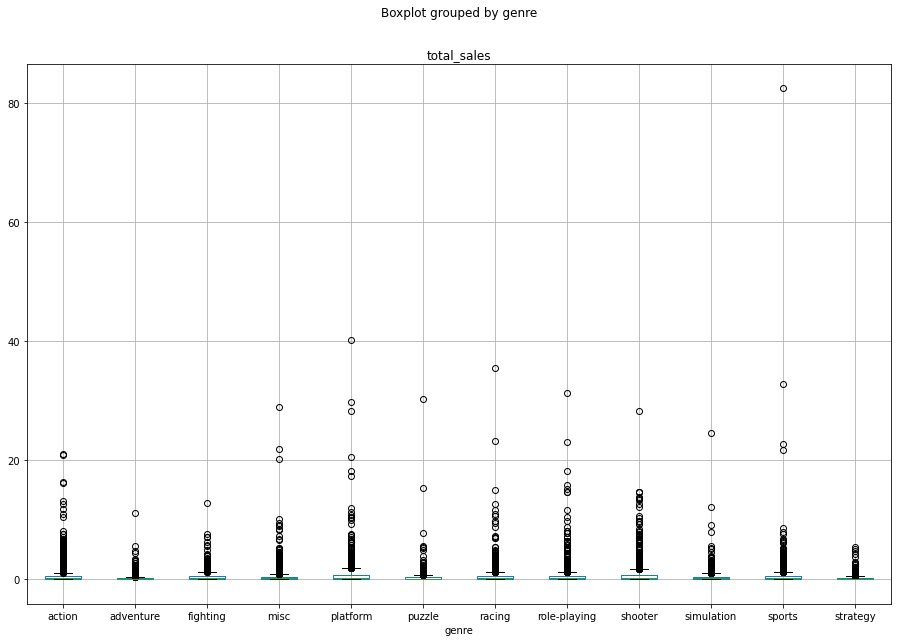

In [56]:
df.boxplot(column='total_sales', by='genre', figsize=(15,10))
#plotting a boxplot for the total_sales by genre of all platforms that has size 15 x 10 inches

plt.show()
#showing the boxplot

At fist glance we can identify no major difference between the boxplots. All medians are close to 0 however we notice extreme outliers for every genre which represent the games that were extremelly successful. More specifically, platform, racing, and role-playing.


Above we analyzed the total sales of games per genre and we have at first spot the action genre, seocnd the shooter genre and lastly the sports genre. It's important to note that we previously when we looked at the genre distribution we didn't have the shooter at top 5 but in total_sales comes second! 

### Analysis Conclusion

In our analysis we looked at the games release per year and and the perfomance for each platform. Later on, we decided to slice our data for data after 2007 since that would be the most relevant for the purpose of our project. After, we created a box plot for the total sales of all games we took a closer look for our top 5 platforms, ps3, x360, wii, ds and ps4. Later, we tried to find a possible correlation coefficient for the the user / critic reviews and total sales for all 5 platforms and we concluded that none had enough evidence to provide a strong correlation. Lastly, we identified the most profitable genres and also looked at all of their distribution.

## User Profile for Each Region

At this step of our project we ephasize on the data per region. We have three regions, North America, Europe and Japana and thus we will create three new variables to store their corresponding relevant data. We will then identify the top 5 platforms per region and how they might differ. Later on we will follow the same strategy for the top 5 genre per region and lastly we will try to find a potential correlation between the ESRB ratings and the sales in individual regions.

In [57]:
na_region = new_df[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'critic_score', 'user_score', 'rating']]
#storing all relevant data to a new variable for the north american region

eu_region = new_df[['name', 'platform', 'year_of_release', 'genre', 'eu_sales', 'critic_score', 'user_score', 'rating']]
#storing all relevant data to a new variable for the european region

jp_region = new_df[['name', 'platform', 'year_of_release', 'genre', 'jp_sales', 'critic_score', 'user_score', 'rating']]
#storing all relevant data to a new variable for the japan region

### Platform Performance per Region

#### Platform Performance in North America

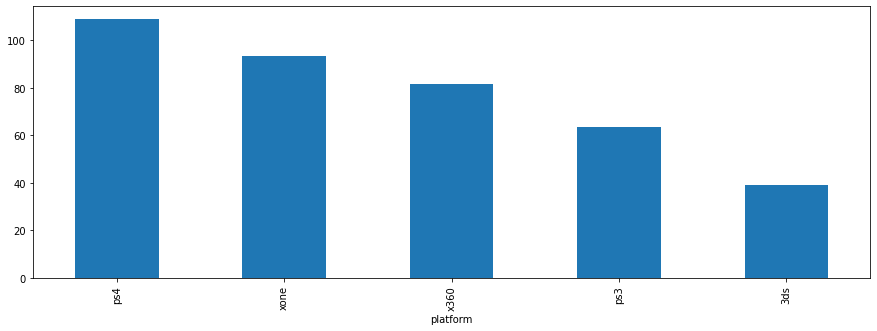

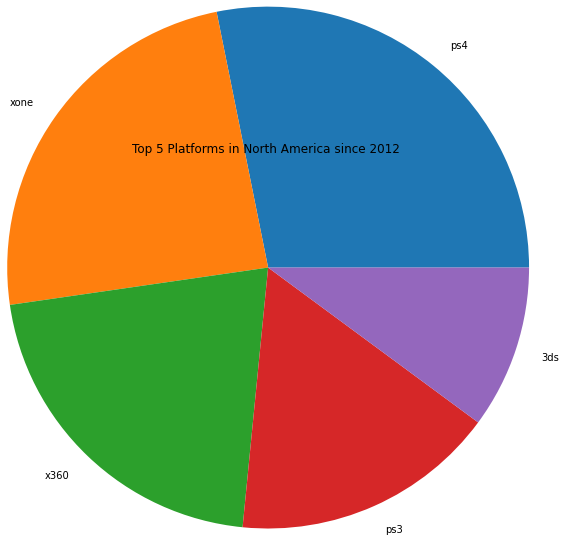

In [58]:
na_platform_sales = na_region.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
#grouping our na_region dataframe by platform to find its total amount of sales for the north america region

na_platform_sales_top5 = na_platform_sales.head()
#storing the top 5 platforms to a variable called na_platform_sales_top5

na_platform_sales_top5.plot(kind='bar', figsize=(15,5))
#plotting the top 5 platforms

plt.show()

plt.pie(na_platform_sales_top5, labels=na_platform_sales_top5.index, radius=3)
#plotting in pie chart ALL platforms

plt.title("Top 5 Platforms in North America since 2012 ")
#naming the pie chart

plt.show()

#### Platform Performance in Europe

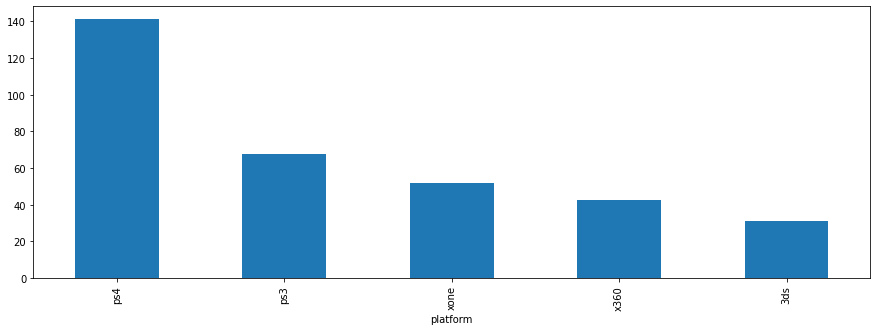

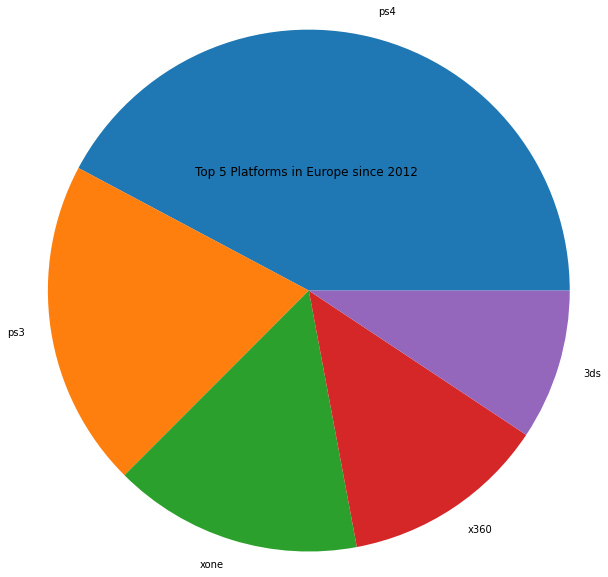

In [59]:
eu_platform_sales = eu_region.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
#grouping our eu_platform_sales dataframe by platform to find its total amount of sales for the european region

eu_platform_sales_top5 = eu_platform_sales.head()
#storing the top 5 platforms to a variable called eu_platform_sales_top5

eu_platform_sales_top5.plot(kind='bar', figsize=(15,5))
#plotting the top 5 platforms

plt.show()

plt.pie(eu_platform_sales_top5, labels=eu_platform_sales_top5.index, radius=3)
#plotting in pie chart ALL platforms

plt.title("Top 5 Platforms in Europe since 2012 ")
#naming the pie chart

plt.show()

#### Platform Performance in Japan

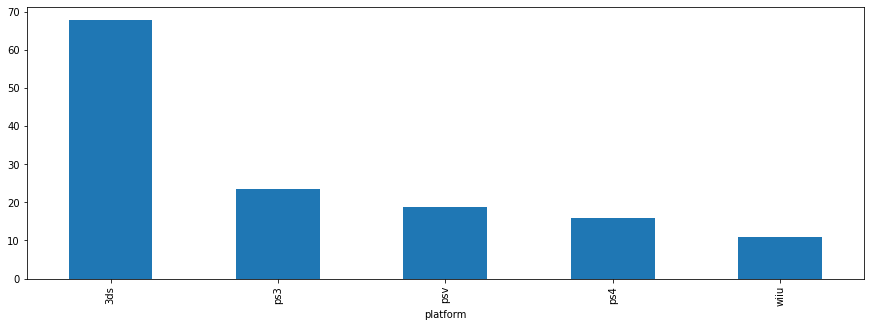

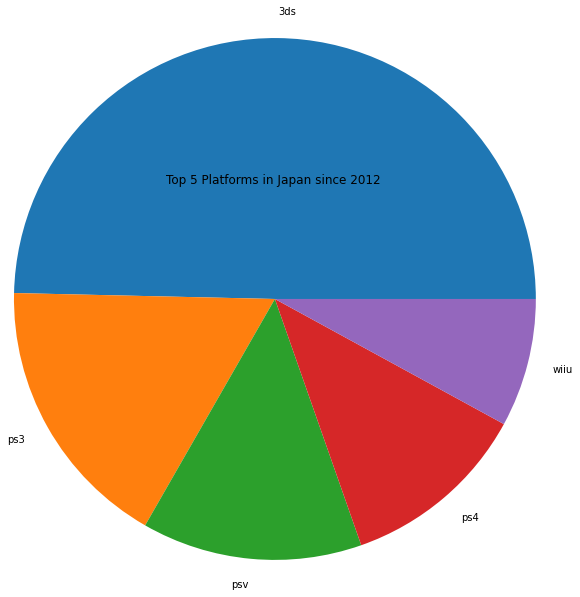

In [60]:
jp_platform_sales = jp_region.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
#grouping our jp_platform_sales dataframe by platform to find its total amount of sales for the japan region

jp_platform_sales_top5 = jp_platform_sales.head()
#storing the top 5 platforms to a variable called eu_platform_sales_top5

jp_platform_sales_top5.plot(kind='bar', figsize=(15,5))
#plotting the top 5 platforms

plt.show()

plt.pie(jp_platform_sales_top5, labels=jp_platform_sales_top5.index, radius=3)
#plotting in pie chart ALL platforms

plt.title("Top 5 Platforms in Japan since 2012 ")
#naming the pie chart

plt.show()

#### Conclusion

We can identify that every region has different likes. For example North America has ds platform at 4th spot and Europe has it at 5th whereas Japan has it number 1. Additionally, Japan has 3ds platform at number 2 (most favorable) whereas North America and Europe don't even have it at their top 5 platforms. It's very interesting to see especially on all the pie charts how different the popularity of the platforms is per region.

### Most Profitable Genres per Region

In [61]:
print(na_region['na_sales'].describe())
#getting a closer look at the exact number for na region

print ()
#printing an empty line

print(eu_region['eu_sales'].describe())
#getting a closer look at the exact number for eu region

print ()
#printing an empty line

print(jp_region['jp_sales'].describe())
#getting a closer look at the exact number for eu region

count    2242.000000
mean        0.195656
std         0.546687
min         0.000000
25%         0.000000
50%         0.020000
75%         0.150000
max         9.660000
Name: na_sales, dtype: float64

count    2242.000000
mean        0.175062
std         0.511518
min         0.000000
25%         0.000000
50%         0.030000
75%         0.130000
max         9.090000
Name: eu_sales, dtype: float64

count    2242.000000
mean        0.062846
std         0.233552
min         0.000000
25%         0.000000
50%         0.010000
75%         0.050000
max         4.350000
Name: jp_sales, dtype: float64


We will consider all games that belong on the 4th quartile (so between 75% and max sales) to be considered popular and we will store this to a new variable for each region. More specifically for na will be any game with sales > 0.21M, for eu will be any game with sales > 0.11M and lastly for jp will be any game with sales > 0.03M.

#### Most Profitable Genres in North America

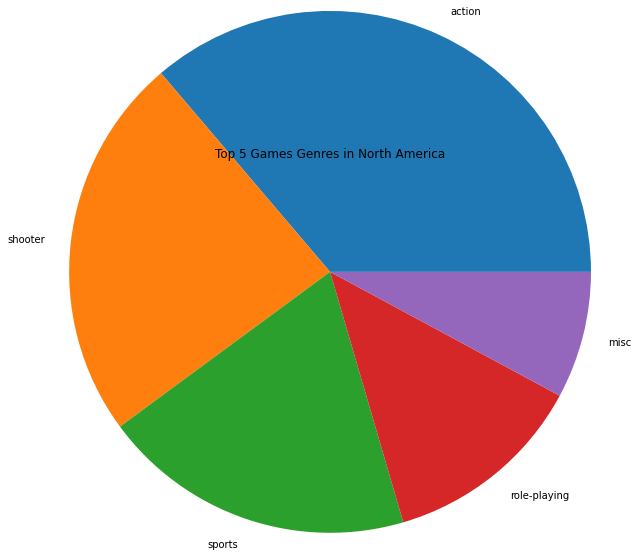

In [62]:
na_popular_games = na_region[na_region['na_sales'] > 0.21]
#storing all sales above 0.21M that were made in na to a new variable

na_genre_count = na_popular_games.groupby('genre')['na_sales'].count().sort_values(ascending=False)
#collecting all genres and their distribution

na_popular_games_top5 = na_genre_count.head()
#storing the top 5 game genres of na to a variable called na_popular_games_top5

plt.pie(na_popular_games_top5, labels=na_popular_games_top5.index, radius=3)
#plotting in pie chart ALL genres for the na region

plt.title("Top 5 Games Genres in North America")
#naming the pie chart

plt.show()

#### Most Profitable Genres in Europe

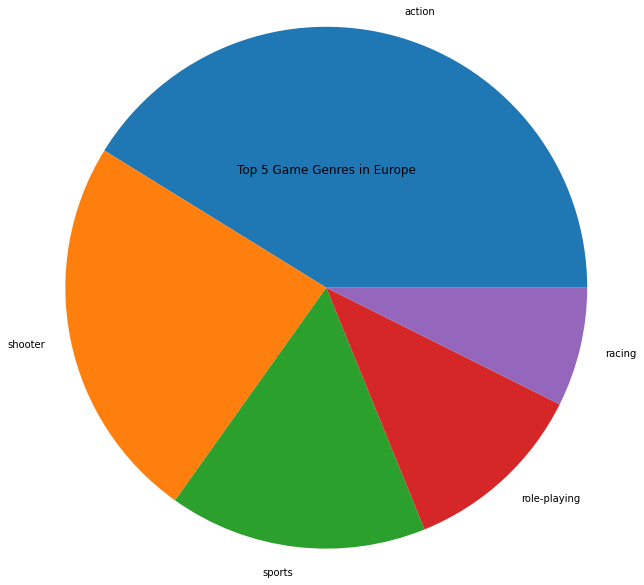

In [63]:
eu_popular_games = eu_region[eu_region['eu_sales'] > 0.11]
#storing all sales above 0.11M that were made in eu to a new variable

eu_genre_count = eu_popular_games.groupby('genre')['eu_sales'].count().sort_values(ascending=False)
#collecting all genres and their distribution

eu_popular_games_top5 = eu_genre_count.head()
#storing the top 5 game genres of eu to a variable called eu_popular_games_top5

plt.pie(eu_popular_games_top5, labels=eu_popular_games_top5.index, radius=3)
#plotting in pie chart ALL genres for the eu region

plt.title("Top 5 Game Genres in Europe")
#naming the pie chart

plt.show()

#### Most Profitable Genres in Japan

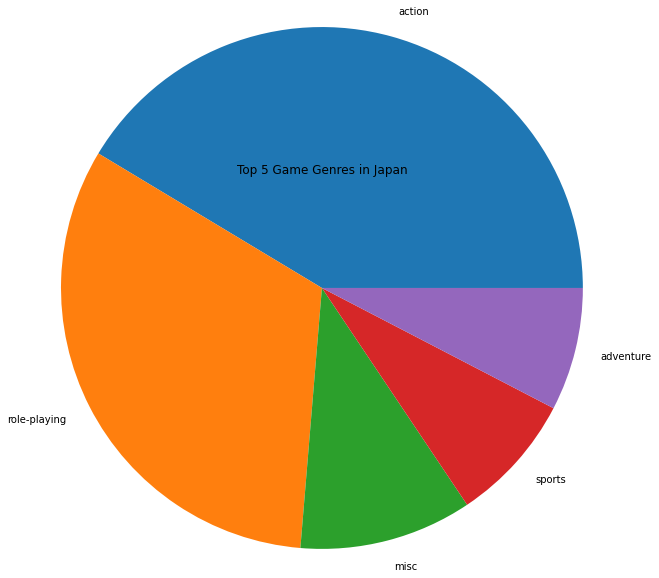

In [64]:
jp_popular_games = jp_region[jp_region['jp_sales'] > 0.03]
#storing all sales above 0.03M that were made in jp to a new variable

jp_genre_count = jp_popular_games.groupby('genre')['jp_sales'].count().sort_values(ascending=False)
#collecting all genres and their distribution

jp_popular_games_top5 = jp_genre_count.head()
#storing the top 5 game genres of jp to a variable called jp_popular_games_top5

plt.pie(jp_popular_games_top5, labels=jp_popular_games_top5.index, radius=3)
#plotting in pie chart ALL genres for the jp region

plt.title("Top 5 Game Genres in Japan")
#naming the pie chart

plt.show()

#### Conclusion

We can tell that action genre dominates all regions but at the second most popular number of genre we have many differences. More specifically, at the North American market we have the sports genre as the second most popular genre, in Europe we have the shooter, and in Japan we have the role-playing genre. From the above statement we can tell that popular genders are not the same in each region.

### ESRB ratings and Sales per Region

#### ESRB Ratings and Sales in North America 

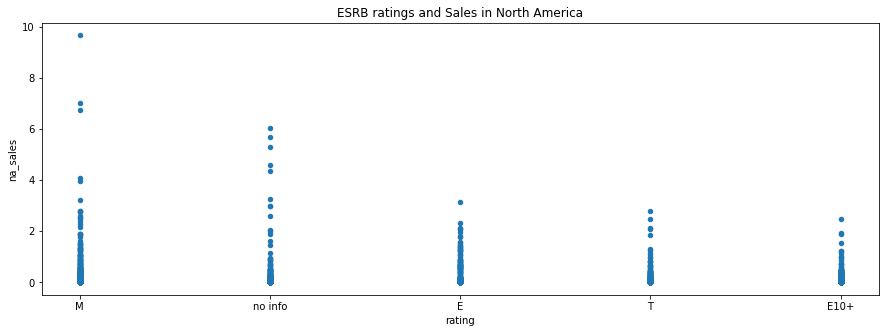

In [65]:
na_region.plot(x='rating', y='na_sales', kind='scatter', figsize=(15,5))
#plotting a scatter for the na_region with x column rating and y column the na_sales, size 15 x 5 inches

plt.title("ESRB ratings and Sales in North America")
#naming the pie chart

plt.show()
#showing the scatter plot

#### ESRB Ratings and Sales in Europe

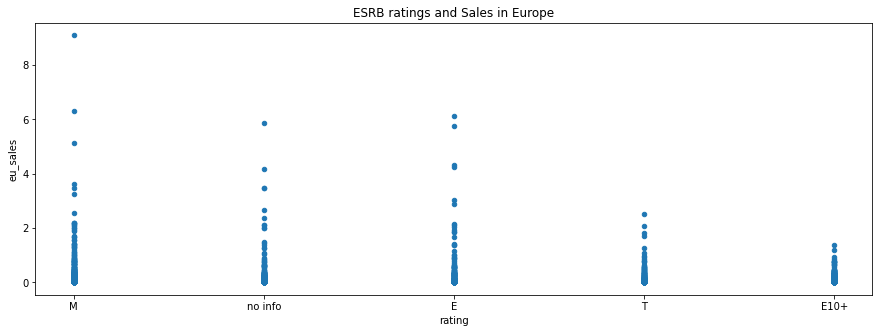

In [66]:
eu_region.plot(x='rating', y='eu_sales', kind='scatter', figsize=(15,5))
#plotting a scatter for the eu_region with x column rating and y column the na_sales, size 15 x 5 inches

plt.title("ESRB ratings and Sales in Europe")
#naming the pie chart

plt.show()
#showing the scatter plot

#### ESRB Ratings and Sales in Japan

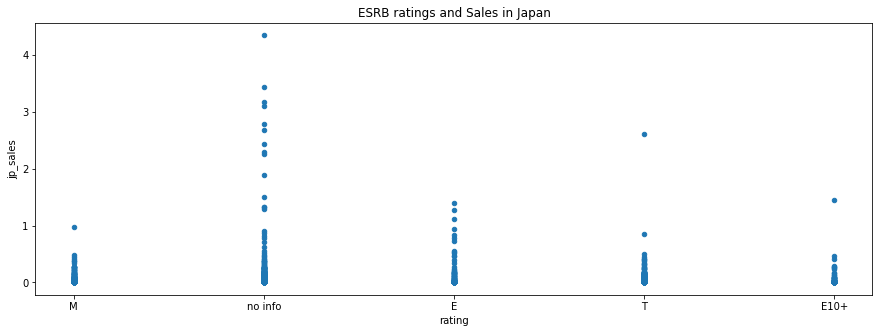

In [67]:
jp_region.plot(x='rating', y='jp_sales', kind='scatter', figsize=(15,5))
#plotting a scatter for the jp_region with x column rating and y column the na_sales, size 15 x 5 inches

plt.title("ESRB ratings and Sales in Japan")
#naming the pie chart

plt.show()
#showing the scatter plot

#### Conclusion

We can clearly identify that the ESRB ratings do affect sales in most regions. Taking a closer look in both the North American market and the European one we can tell that games with rating E and M have much higher sales than games with a rating of T, E10+,EC and RP. In Japan games with T or E rating have the most sales. We can conclude that ESRB ratings do affect the sales.

## Testing the Hypothesis

### Stating H0 and HA

Let’s start by specifying our null hypothesis and alternate hypothesis:

Null Hypothesis: Average user ratings of the Xbox One and PC platforms are the same.

Alternate Hypothesis: Average user ratings for the Action and Sports genres are different.

In [68]:
filtered_df = df[df['user_score'] != -1]
#making sure that we store all data that is not -1 to a new variable called 'filtered_df'
#since this is a value we created and thus is unpragmatic

In [69]:
pc_data = filtered_df[filtered_df['platform'] == 'pc']
#storing all pc data to a new variable called 'pc_data'

xb_data = filtered_df[filtered_df['platform'] == 'xb']
#storing all xb data to a new variable called 'xb_data'

print(np.var(pc_data['user_score']))
#finding the variance for the pc_data and user_score column

print(np.var(xb_data['user_score']))
#finding the variance for the xb_data and user_score column

2.3377471580367684
2.275784720847069


At first glance it looks like the variance are neither very close nor very far. Let's run the t-test.

### T-test

In [70]:
alpha = 0.05 
#creating our statistical significance at 5% 

results = st.ttest_ind(pc_data['user_score'], xb_data['user_score'], equal_var=False)
#performing the t-test with the help of the scipy library

print ('p-value:', results.pvalue) 
#printing the p-value

if results.pvalue < alpha: 
#if p-value is less than alpha meaning the averages are not the same

    print ("We reject the null Hypothesis") 
    #we won't reject the null hypothesis

else:
    print ("We can't reject the null hypothesis") 
    #we will reject the null hypothesis

p-value: 1.6723325756706103e-07
We reject the null Hypothesis


### Conclusion

It turns out that we don't have enough evidence to reject the null hypothesis.

## Overall Conclusion

In our project we started by "cleaning" our data column by column and we added a total_slaes column that would help our future analysis. Additionally, at the values of 'critic_score' and 'user_score' are very individual as every critic/user has own oppinion on the game. Thus, we updated all NaNs tbds with an unpragmatic value of -1. If we would have replaced with mean/median then our final result would not have been representative of our data. 

Later, we started our analysis by looking at the game releases per year, each platform performance and we concluded that our most relevant data to use for the purpose of our analysis would be the data after the year 2007. Once we added the relevant data to a new variable we analyzed the performance of each platform (with the new data), built a box plot for the global sales of all games, broken down by platform and discussed if the differences in sales and average were significant. Later, we took a look at how user and professional reviews affect sales for one popular platform (we chose specifically the ds platform). Additionally, we built a scatter plot and calculate the correlation between reviews and sales. Lastly, we focused on the general distribution of games by genre and commented upon the most profitable genres combined with creating a boxplot to reflect the information.

Our next stop for our project was to create a user profile for each of the 3 regions that we had data for, North America, Europe and Japan. Later, we looked at the platform performance for each as well as the the most profitable genres per region. Lastly, we tried to see if the ESRB ratings afferct in any way the sales of the games, which we concluded that it does.

We completed our project by testing the null hypothesis. Prior doing so though we filtered the data so that the  -1 (the unpragamtic value from the 'user_score' column) was excluded from our test hypothesis since it is not a value that reflects the real data. 

Average user ratings of the Xbox One and PC platforms are the same. We concluded that we don't have enough evidence to reject the null hypothesis.